<span style="font-size: 30px;">

**Hypothesis Testing  - Time**

</span>

As part of your analysis, you’ll conduct hypothesis testing to make data-driven conclusions about the effectiveness of the redesign. See the full details below:

Completion Rate
Given the data and KPIs you have explored discussed, one interesting hypothesis to test is related to the completion rate between the Test and Control groups. Since the new design (Test group) had a higher completion rate compared to the old design (Control group), you are required to confirm if this difference is statistically significant.

Make sure to define the proper null and an alternative hypothesis to test it. Use the provided data to test these hypotheses, and determine if you can reject the null hypothesis in favor of the alternative. Make sure to consider the significance level, p-value, the statistical test prerequisites, and other relevant statistical measures in your analysis.

Completion Rate with a Cost-Effectiveness Threshold
The introduction of a new UI design comes with its associated costs: design, development, testing, potential training for staff, and possible short-term disruptions or adjustments for users. To justify these costs, Vanguard has determined that any new design should lead to a minimum increase in the completion rate to be deemed cost-effective.

Threshold: Vanguard has set this minimum increase in completion rate at 5%. This is the rate at which the projected benefits, in terms of increased user engagement and potential revenue, are estimated to outweigh the costs of the new design.

You are required to carry out another analysis, ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. If the new design doesn’t lead to at least this level of improvement, it may not be justifiable from a cost perspective, regardless of its statistical significance.

Other Hypothesis Examples
You have been given the freedom to choose another hypothesis to test. Here are some examples:

You might want to test whether the average age of clients engaging with the new process is the same as those engaging with the old process
You might want to test if the average client tenure (how long they’ve been with Vanguard) of those engaging with the new process is the same as those engaging with the old process
You might want to test if there are gender differences that affect engaging with the new or old process
Make sure to define the proper null and alternative hypothesis to test it. You are required to choose one or come up with another of your own to test.





    **Experiment Evaluation**

You are also required to carry out an evaluation of the experiment by answering questions about the design effectiveness, duration and any additional data needs. See the full details below:

Design Effectiveness
Was the experiment well-structured?
Were clients randomly and equally divided between the old and new designs?
Were there any biases?
Duration Assessment
Was the timeframe of the experiment (from 3/15/2017 to 6/20/2017) adequate to gather meaningful data and insights?

Additional Data Needs
What other data, if available, could enhance the analysis?

In [106]:
import pandas as pd


df_gold_test_e = pd.read_excel("Data_gold_test_error.xlsx")
df_gold_control_e = pd.read_excel("Data_gold_control_error.xlsx")
All_data= pd.read_excel("merged_data.xlsx")


In [107]:
All_data.head(2)

,client_id,confirm,start,step_1,step_2,step_3,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date,time
0,169,1,1,1,1,1,NaN,21,262,47.5,M,2,501570.72,4,4,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-17,15:27:07
1,169,1,1,1,1,1,NaN,21,262,47.5,M,2,501570.72,4,4,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-17,15:26:51


# Data Gold Test

In [108]:
df_gold_test_e

,client_id,Variation,visit_id,confirm,start,step_1,step_2,step_3,complete,Error,N_er_st_s1,N_er_s1_s2,N_er_s2_s3,N_er_s3_con,Total errors
0,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0
1,6038525,Test,160662411_47414103546_387098,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0
2,6219677,Test,402500490_59473331055_178140,1,3,3,4,2,1.0,1,0.0,1.0,2.0,1.0,4.0
3,6219677,Test,733647053_97830081870_147132,0,4,4,4,2,0.0,1,0.0,0.0,2.0,2.0,4.0
4,6219677,Test,237397313_76996853966_974538,0,3,2,2,2,0.0,1,1.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,5492897,Test,772609923_69272363513_45475,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0
5554,5492897,Test,476101525_35474335958_420184,1,0,0,0,0,NaN,1,NaN,NaN,NaN,1.0,NaN
5555,9684806,Test,304868249_69734281141_323816,0,3,2,1,1,0.0,1,1.0,1.0,0.0,1.0,3.0
5556,4084839,Test,800911487_42591652049_196692,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0


In [109]:
import pandas as pd

# Supondo que você já tenha carregado os dataframes df_gold_test_e e All_data

# Adicionando as colunas da All_data à df_gold_test_e
df_gold_test_e1 = df_gold_test_e.merge(All_data[['visit_id', 'date', 'time','process_step']], on='visit_id', how='left')

# Agora df_gold_test_e terá as colunas nova_coluna1 e nova_coluna2 da All_data, mergeadas pela coluna visit_id
df_gold_test_e1

,client_id,Variation,visit_id,confirm,start,step_1,step_2,step_3,complete,Error,N_er_st_s1,N_er_s1_s2,N_er_s2_s3,N_er_s3_con,Total errors,date,time,process_step
0,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-04-09,17:07:46,confirm
1,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-04-09,17:06:32,step_3
2,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-04-09,17:05:36,step_2
3,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-04-09,17:05:32,step_1
4,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-04-09,17:05:00,start
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25855,9646248,Test,161730376_52165437931_639965,0,2,3,4,1,1.0,1,1.0,1.0,3.0,1.0,6.0,2017-04-02,20:17:13,step_1
25856,9646248,Test,161730376_52165437931_639965,0,2,3,4,1,1.0,1,1.0,1.0,3.0,1.0,6.0,2017-04-02,20:00:45,start
25857,9646248,Test,161730376_52165437931_639965,0,2,3,4,1,1.0,1,1.0,1.0,3.0,1.0,6.0,2017-04-02,20:00:38,start
25858,9646248,Test,161730376_52165437931_639965,0,2,3,4,1,1.0,1,1.0,1.0,3.0,1.0,6.0,2017-04-02,20:00:30,step_2


In [110]:
import pandas as pd

# Supondo que você já tenha carregado seus dados para um DataFrame chamado df_gold_test_e1

# Função para calcular a diferença de tempo e atualizar a coluna "time_st_s1"
def calculate_time_difference(row):
    if row['process_step'] == 'step_1':
        visit_id = row['visit_id']
        start_row = df_gold_test_e1[(df_gold_test_e1['visit_id'] == visit_id) & (df_gold_test_e1['process_step'] == 'start')]
        if not start_row.empty:
            step_1_row = df_gold_test_e1[(df_gold_test_e1['visit_id'] == visit_id) & (df_gold_test_e1['process_step'] == 'step_1')]
            if not step_1_row.empty:
                time_start = start_row['time'].iloc[0]
                time_step_1 = step_1_row['time'].iloc[0]
                time_diff = abs(pd.to_timedelta(time_step_1) - pd.to_timedelta(time_start)).total_seconds()
                return time_diff
    return None

# Aplicar a função a cada linha do DataFrame e atualizar a coluna "time_st_s1"
df_gold_test_e1['time_st_s1'] = df_gold_test_e1.apply(calculate_time_difference, axis=1)




In [111]:
# Função para calcular a diferença de tempo e atualizar a coluna "time_s1_s2"
def calculate_time_difference(row):
    if row['process_step'] == 'step_2':
        visit_id = row['visit_id']
        start_row = df_gold_test_e1[(df_gold_test_e1['visit_id'] == visit_id) & (df_gold_test_e1['process_step'] == 'step_1')]
        if not start_row.empty:
            step_2_row = df_gold_test_e1[(df_gold_test_e1['visit_id'] == visit_id) & (df_gold_test_e1['process_step'] == 'step_2')]
            if not step_2_row.empty:
                time_start = start_row['time'].iloc[0]
                time_step_2 = step_2_row['time'].iloc[0]
                time_diff = abs(pd.to_timedelta(time_step_2) - pd.to_timedelta(time_start)).total_seconds()
                return time_diff
    return None

# Aplicar a função a cada linha do DataFrame e atualizar a coluna "time_s1_s2"
df_gold_test_e1['time_s1_s2'] = df_gold_test_e1.apply(calculate_time_difference, axis=1)

In [112]:
# Função para calcular a diferença de tempo e atualizar a coluna "time_s1_s2"
def calculate_time_difference(row):
    if row['process_step'] == 'step_3':
        visit_id = row['visit_id']
        start_row = df_gold_test_e1[(df_gold_test_e1['visit_id'] == visit_id) & (df_gold_test_e1['process_step'] == 'step_2')]
        if not start_row.empty:
            step_3_row = df_gold_test_e1[(df_gold_test_e1['visit_id'] == visit_id) & (df_gold_test_e1['process_step'] == 'step_3')]
            if not step_3_row.empty:
                time_start = start_row['time'].iloc[0]
                time_step_3 = step_3_row['time'].iloc[0]
                time_diff = abs(pd.to_timedelta(time_step_3) - pd.to_timedelta(time_start)).total_seconds()
                return time_diff
    return None

# Aplicar a função a cada linha do DataFrame e atualizar a coluna "time_s1_s2"
df_gold_test_e1['time_s2_s3'] = df_gold_test_e1.apply(calculate_time_difference, axis=1)

In [113]:
# Função para calcular a diferença de tempo e atualizar a coluna "time_s1_s2"
def calculate_time_difference(row):
    if row['process_step'] == 'confirm':
        visit_id = row['visit_id']
        start_row = df_gold_test_e1[(df_gold_test_e1['visit_id'] == visit_id) & (df_gold_test_e1['process_step'] == 'step_3')]
        if not start_row.empty:
            confirm_row = df_gold_test_e1[(df_gold_test_e1['visit_id'] == visit_id) & (df_gold_test_e1['process_step'] == 'confirm')]
            if not confirm_row.empty:
                time_start = start_row['time'].iloc[0]
                time_confirm = confirm_row['time'].iloc[0]
                time_diff = abs(pd.to_timedelta(time_confirm) - pd.to_timedelta(time_start)).total_seconds()
                return time_diff
    return None


df_gold_test_e1['time_s3_confirm'] = df_gold_test_e1.apply(calculate_time_difference, axis=1)

In [114]:
df_gold_test_e1

,client_id,Variation,visit_id,confirm,start,step_1,step_2,step_3,complete,Error,...,N_er_s2_s3,N_er_s3_con,Total errors,date,time,process_step,time_st_s1,time_s1_s2,time_s2_s3,time_s3_confirm
0,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-04-09,17:07:46,confirm,NaN,NaN,NaN,74.0
1,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-04-09,17:06:32,step_3,NaN,NaN,56.0,NaN
2,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-04-09,17:05:36,step_2,NaN,4.0,NaN,NaN
3,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-04-09,17:05:32,step_1,32.0,NaN,NaN,NaN
4,346781,Test,138480024_16310699196_180947,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-04-09,17:05:00,start,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25855,9646248,Test,161730376_52165437931_639965,0,2,3,4,1,1.0,1,...,3.0,1.0,6.0,2017-04-02,20:17:13,step_1,18565.0,NaN,NaN,NaN
25856,9646248,Test,161730376_52165437931_639965,0,2,3,4,1,1.0,1,...,3.0,1.0,6.0,2017-04-02,20:00:45,start,NaN,NaN,NaN,NaN
25857,9646248,Test,161730376_52165437931_639965,0,2,3,4,1,1.0,1,...,3.0,1.0,6.0,2017-04-02,20:00:38,start,NaN,NaN,NaN,NaN
25858,9646248,Test,161730376_52165437931_639965,0,2,3,4,1,1.0,1,...,3.0,1.0,6.0,2017-04-02,20:00:30,step_2,NaN,68.0,NaN,NaN


In [115]:
# start - step 1
df_gold_test_e1['time_st_s1'].sum()
total_hours_1t = round(df_gold_test_e1['time_st_s1'].sum() / 3600, 2)
print("Total time beteen start and step_1 ", total_hours_1t, "h")

Total time beteen start and step_1  8908.73 h


In [116]:
# step 1 - step2
df_gold_test_e1['time_s1_s2'].sum()
total_hours_2t= round(df_gold_test_e1['time_s1_s2'].sum() / 3600, 2)
print("Total time beteen start and step_1 ", total_hours_2t, "h")

Total time beteen start and step_1  6096.85 h


In [117]:
# step 2 - step3
df_gold_test_e1['time_s2_s3'].sum()
total_hours_3t = round(df_gold_test_e1['time_s2_s3'].sum() / 3600, 2)
print("Total time beteen start and step_1 ", total_hours_3t, "h")

Total time beteen start and step_1  4758.87 h


In [118]:
# step 3 - confirm
df_gold_test_e1['time_s3_confirm'].sum()
total_hours_4t = round(df_gold_test_e1['time_s3_confirm'].sum() / 3600, 2)
print("Total time beteen start and step_1 ", total_hours_4t, "h")

Total time beteen start and step_1  4366.0 h


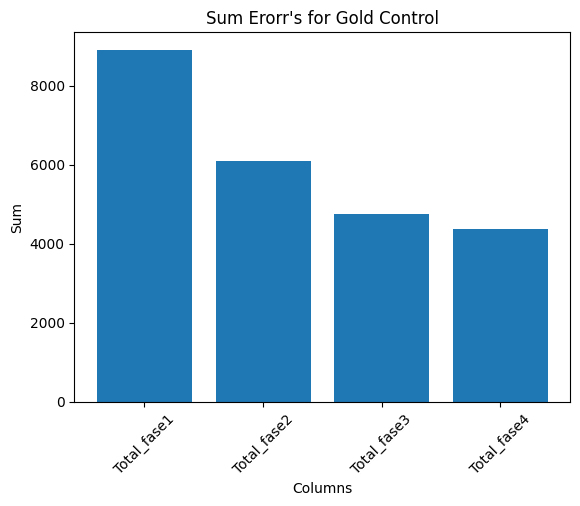

In [119]:
import matplotlib.pyplot as plt

# Calculate the sums
sum_values = [total_hours_1t,
              total_hours_2t,
              total_hours_3t,
              total_hours_4t]

# Column names
columns = ['Total_fase1', 'Total_fase2', 'Total_fase3', 'Total_fase4']

# Create the bar plot
plt.bar(columns, sum_values)
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.xticks(rotation=45)
plt.title("Sum Erorr's for Gold Control")
plt.show()

In [120]:
# Somar os valores das colunas
total_time = df_gold_test_e1['time_st_s1'].sum() + df_gold_test_e1['time_s1_s2'].sum() + df_gold_test_e1['time_s2_s3'].sum() + df_gold_test_e1['time_s3_confirm'].sum()

total_hours_gt = round(total_time / 3600, 2)
print("Total time of all fases ", total_hours_gt, "h")

Total time of all fases  24130.46 h


# Data Gold Control

In [121]:
df_gold_control_e

,client_id,Variation,visit_id,confirm,start,step_1,step_2,step_3,complete,Error,N_er_st_s1,N_er_s1_s2,N_er_s2_s3,N_er_s3_con,Total errors
0,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0
1,7179800,Control,834345684_20753053466_629354,3,2,1,1,1,NaN,1,1.0,0.0,0.0,2.0,3.0
2,7679428,Control,377121016_67032089535_295299,0,2,0,0,0,0.0,1,2.0,0.0,0.0,0.0,2.0
3,7679428,Control,702065802_57911235390_499219,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0
4,3654308,Control,726496682_33297666610_800081,0,1,0,0,0,0.0,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,1550660,Control,143274221_81838514499_21074,0,1,1,0,0,0.0,1,0.0,1.0,0.0,0.0,1.0
4751,2833480,Control,715082992_31158513777_974487,0,1,1,0,0,0.0,1,0.0,1.0,0.0,0.0,1.0
4752,8881896,Control,740631430_6221639850_832960,1,1,1,2,1,1.0,1,0.0,1.0,1.0,0.0,2.0
4753,8023625,Control,710520941_37998535484_436282,0,1,0,0,0,0.0,1,1.0,0.0,0.0,0.0,1.0


In [122]:
df_gold_control_e1 = df_gold_control_e.merge(All_data[['visit_id', 'date', 'time','process_step']], on='visit_id', how='left')

# Agora df_gold_test_e terá as colunas nova_coluna1 e nova_coluna2 da All_data, mergeadas pela coluna visit_id
df_gold_control_e1

,client_id,Variation,visit_id,confirm,start,step_1,step_2,step_3,complete,Error,N_er_st_s1,N_er_s1_s2,N_er_s2_s3,N_er_s3_con,Total errors,date,time,process_step
0,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-03-29,12:09:50,confirm
1,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-03-29,11:58:50,step_3
2,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-03-29,11:58:45,step_2
3,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-03-29,11:58:36,step_1
4,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,0.0,0.0,0.0,0.0,0.0,2017-04-12,18:39:32,start
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20624,8881896,Control,740631430_6221639850_832960,1,1,1,2,1,1.0,1,0.0,1.0,1.0,0.0,2.0,2017-03-29,14:54:31,step_2
20625,8881896,Control,740631430_6221639850_832960,1,1,1,2,1,1.0,1,0.0,1.0,1.0,0.0,2.0,2017-03-29,14:54:30,step_1
20626,8881896,Control,740631430_6221639850_832960,1,1,1,2,1,1.0,1,0.0,1.0,1.0,0.0,2.0,2017-03-29,14:53:47,start
20627,8023625,Control,710520941_37998535484_436282,0,1,0,0,0,0.0,1,1.0,0.0,0.0,0.0,1.0,2017-04-01,11:41:18,start


In [123]:
import pandas as pd

# Supondo que você já tenha carregado seus dados para um DataFrame chamado df_gold_test_e1

# Função para calcular a diferença de tempo e atualizar a coluna "time_st_s1"
def calculate_time_difference(row):
    if row['process_step'] == 'step_1':
        visit_id = row['visit_id']
        start_row = df_gold_control_e1[(df_gold_control_e1['visit_id'] == visit_id) & (df_gold_control_e1['process_step'] == 'start')]
        if not start_row.empty:
            step_1_row = df_gold_control_e1[(df_gold_control_e1['visit_id'] == visit_id) & (df_gold_control_e1['process_step'] == 'step_1')]
            if not step_1_row.empty:
                time_start = start_row['time'].iloc[0]
                time_step_1 = step_1_row['time'].iloc[0]
                time_diff = abs(pd.to_timedelta(time_step_1) - pd.to_timedelta(time_start)).total_seconds()
                return time_diff
    return None

# Aplicar a função a cada linha do DataFrame e atualizar a coluna "time_st_s1"
df_gold_control_e1['time_st_s1'] = df_gold_control_e1.apply(calculate_time_difference, axis=1)

In [124]:
# Função para calcular a diferença de tempo e atualizar a coluna "time_s1_s2"
def calculate_time_difference(row):
    if row['process_step'] == 'step_2':
        visit_id = row['visit_id']
        start_row = df_gold_control_e1[(df_gold_control_e1['visit_id'] == visit_id) & (df_gold_control_e1['process_step'] == 'step_1')]
        if not start_row.empty:
            step_2_row = df_gold_control_e1[(df_gold_control_e1['visit_id'] == visit_id) & (df_gold_control_e1['process_step'] == 'step_2')]
            if not step_2_row.empty:
                time_start = start_row['time'].iloc[0]
                time_step_2 = step_2_row['time'].iloc[0]
                time_diff = abs(pd.to_timedelta(time_step_2) - pd.to_timedelta(time_start)).total_seconds()
                return time_diff
    return None

# Aplicar a função a cada linha do DataFrame e atualizar a coluna "time_s1_s2"
df_gold_control_e1['time_s1_s2'] = df_gold_control_e1.apply(calculate_time_difference, axis=1)

In [125]:
# Função para calcular a diferença de tempo e atualizar a coluna "time_s1_s2"
def calculate_time_difference(row):
    if row['process_step'] == 'step_3':
        visit_id = row['visit_id']
        start_row = df_gold_control_e1[(df_gold_control_e1['visit_id'] == visit_id) & (df_gold_control_e1['process_step'] == 'step_2')]
        if not start_row.empty:
            step_3_row = df_gold_control_e1[(df_gold_control_e1['visit_id'] == visit_id) & (df_gold_control_e1['process_step'] == 'step_3')]
            if not step_3_row.empty:
                time_start = start_row['time'].iloc[0]
                time_step_3 = step_3_row['time'].iloc[0]
                time_diff = abs(pd.to_timedelta(time_step_3) - pd.to_timedelta(time_start)).total_seconds()
                return time_diff
    return None

# Aplicar a função a cada linha do DataFrame e atualizar a coluna "time_s1_s2"
df_gold_control_e1['time_s2_s3'] = df_gold_control_e1.apply(calculate_time_difference, axis=1)

In [126]:
# Função para calcular a diferença de tempo e atualizar a coluna "time_s1_s2"
def calculate_time_difference(row):
    if row['process_step'] == 'confirm':
        visit_id = row['visit_id']
        start_row = df_gold_control_e1[(df_gold_control_e1['visit_id'] == visit_id) & (df_gold_control_e1['process_step'] == 'step_3')]
        if not start_row.empty:
            confirm_row = df_gold_control_e1[(df_gold_control_e1['visit_id'] == visit_id) & (df_gold_control_e1['process_step'] == 'confirm')]
            if not confirm_row.empty:
                time_start = start_row['time'].iloc[0]
                time_confirm = confirm_row['time'].iloc[0]
                time_diff = abs(pd.to_timedelta(time_confirm) - pd.to_timedelta(time_start)).total_seconds()
                return time_diff
    return None


df_gold_control_e1['time_s3_confirm'] = df_gold_control_e1.apply(calculate_time_difference, axis=1)

In [127]:
df_gold_control_e1

,client_id,Variation,visit_id,confirm,start,step_1,step_2,step_3,complete,Error,...,N_er_s2_s3,N_er_s3_con,Total errors,date,time,process_step,time_st_s1,time_s1_s2,time_s2_s3,time_s3_confirm
0,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-03-29,12:09:50,confirm,NaN,NaN,NaN,660.0
1,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-03-29,11:58:50,step_3,NaN,NaN,5.0,NaN
2,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-03-29,11:58:45,step_2,NaN,9.0,NaN,NaN
3,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-03-29,11:58:36,step_1,24056.0,NaN,NaN,NaN
4,7946939,Control,819610789_74349965849_582778,1,1,1,1,1,1.0,0,...,0.0,0.0,0.0,2017-04-12,18:39:32,start,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20624,8881896,Control,740631430_6221639850_832960,1,1,1,2,1,1.0,1,...,1.0,0.0,2.0,2017-03-29,14:54:31,step_2,NaN,13678.0,NaN,NaN
20625,8881896,Control,740631430_6221639850_832960,1,1,1,2,1,1.0,1,...,1.0,0.0,2.0,2017-03-29,14:54:30,step_1,43.0,NaN,NaN,NaN
20626,8881896,Control,740631430_6221639850_832960,1,1,1,2,1,1.0,1,...,1.0,0.0,2.0,2017-03-29,14:53:47,start,NaN,NaN,NaN,NaN
20627,8023625,Control,710520941_37998535484_436282,0,1,0,0,0,0.0,1,...,0.0,0.0,1.0,2017-04-01,11:41:18,start,NaN,NaN,NaN,NaN


In [128]:
# start - step 1
df_gold_control_e1['time_st_s1'].sum()
total_hours_1 = round(df_gold_control_e1['time_st_s1'].sum() / 3600, 2)
print("Total time beteen start and step_1 ", total_hours_1, "h")

Total time beteen start and step_1  6520.93 h


In [129]:
# step 1 - step2
df_gold_control_e1['time_s1_s2'].sum()
total_hours_2= round(df_gold_control_e1['time_s1_s2'].sum() / 3600, 2)
print("Total time beteen start and step_1 ", total_hours_2, "h")

Total time beteen start and step_1  5446.44 h


In [130]:
# step 2 - step3
df_gold_control_e1['time_s2_s3'].sum()
total_hours_3 = round(df_gold_control_e1['time_s2_s3'].sum() / 3600, 2)
print("Total time beteen start and step_1 ", total_hours_3, "h")

Total time beteen start and step_1  4262.77 h


In [131]:
# step 3 - confirm
df_gold_control_e1['time_s3_confirm'].sum()
total_hours_4 = round(df_gold_control_e1['time_s3_confirm'].sum() / 3600, 2)
print("Total time beteen start and step_1 ", total_hours_4, "h")

Total time beteen start and step_1  3351.55 h


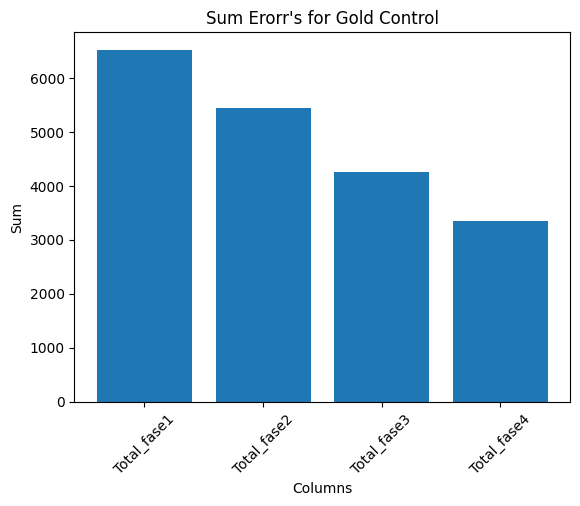

In [132]:
import matplotlib.pyplot as plt

# Calculate the sums
sum_values = [total_hours_1,
              total_hours_2,
              total_hours_3,
              total_hours_4]

# Column names
columns = ['Total_fase1', 'Total_fase2', 'Total_fase3', 'Total_fase4']

# Create the bar plot
plt.bar(columns, sum_values)
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.xticks(rotation=45)
plt.title("Sum Erorr's for Gold Control")
plt.show()

In [133]:
# Somar os valores das colunas
total_time = df_gold_control_e1['time_st_s1'].sum() + df_gold_control_e1['time_s1_s2'].sum() + df_gold_control_e1['time_s2_s3'].sum() + df_gold_control_e1['time_s3_confirm'].sum()

total_hours_gc = round(total_time / 3600, 2)
print("Total time of all fases ", total_hours_gc, "h")

Total time of all fases  19581.69 h


# Hypothesis_Testing

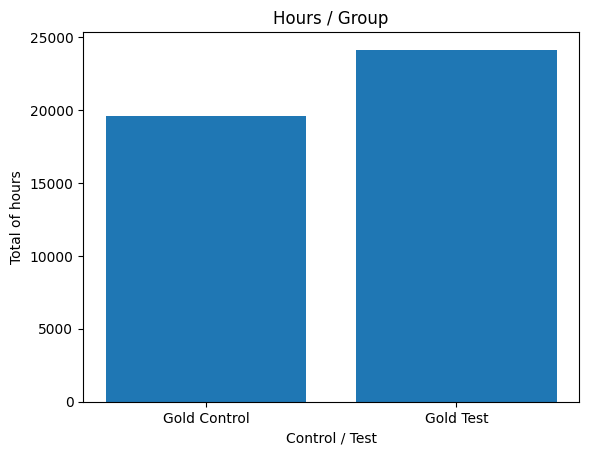

In [151]:
import matplotlib.pyplot as plt

# Totais de horas de cada grupo
total_times = [total_hours_gc, total_hours_gt]

# Nomes das tabelas
labels = ['Gold Control', 'Gold Test']

# Criar o gráfico de barras
plt.bar(labels, total_times)
plt.xlabel('Control / Test')
plt.ylabel('Total of hours')
plt.title('Hours / Group')

plt.show()

In [158]:

# Calculate total time rates
control_time_rate = total_hours_gc / len(df_gold_control_e1)  # Substitua 'control_group' pelo nome correto do grupo de controle
test_time_rate = total_hours_gt / len(df_gold_test_e1)  # Substitua 'test_group' pelo nome correto do grupo de teste

print("Control Group time Rate:", control_time_rate)
print("Test Group time Rate:", test_time_rate)

Control Group time Rate: 0.94923117940763
Test Group time Rate: 0.9331191028615622


**- Visualize outcomes**

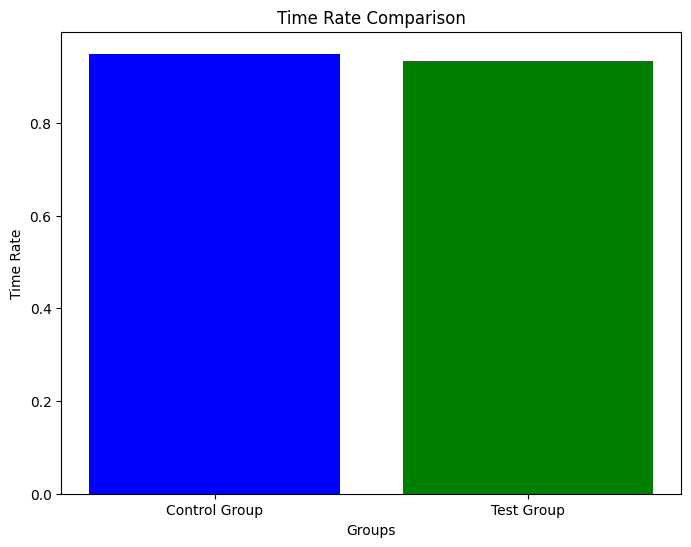

In [162]:
import matplotlib.pyplot as plt

# Dados de exemplo para control_time_rate e test_time_rate
labels = ['Control Group', 'Test Group']
values = [control_time_rate, test_time_rate]

# Visualize outcomes for Control Group and Test Group
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.title('Time Rate Comparison')
plt.xlabel('Groups')
plt.ylabel('Time Rate')
plt.show()

In [146]:
from scipy.stats import ttest_ind

# Perform hypothesis test
t_stat, p_value = ttest_ind(control_total_time, test_total_time, equal_var=False)  
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 2.3859571085242526
P-value: 0.017052707276875353





- The T-statistic is a measure of the difference between the means of two groups, relative to the variability in the data. It indicates how significant the difference is between the two groups. In this case, a T-statistic of 2.3859571085242526 suggests that there is a notable difference between the means of the two groups.

- The P-value is the probability of obtaining a result as extreme as, or more extreme than, the observed result, under the assumption that the null hypothesis is true. In this case, a P-value of 0.017052707276875353 suggests that there is a 1.7% probability of observing the difference between the groups if there were actually no difference.

In general, if the P-value is less than a chosen significance level (often 0.05), then the null hypothesis is rejected, indicating that there is a significant difference between the groups. If the P-value is greater than the significance level, then the null hypothesis is not rejected, suggesting that there is not enough evidence to conclude that there is a significant difference.